## Exploratory Data Analysis

### Preliminary

In [1]:
import requests, json # for getting data
from urllib.parse import urlencode

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

let's import our cleaned data

In [2]:
fname = 'data/centadata_clean.csv'
df = pd.read_csv( fname, index_col = 0 )

df.head()

,txdate,price,saleablearea,xaxis,yaxis,buildingaddress,dateofcompletion,numberofunits,numberoffloors,flatsperfloor,schoolnet,region,price_per_sqf,flat_type,floor_number,building_age,deal_age,deal_year,schoolnet_en
0,2017-02-16,2880000,392.0,NO. 205A,2/F,205A TUNG CHOI STREET,1963-08-01,8,8,1,九龍區32號校網,Mongkok/Yaumatei,7346.938776,n,2,55.301848,641,2017,Kowloon district No. 32 school network
1,2018-01-11,3000000,392.0,NO. 205A,3/F,205A TUNG CHOI STREET,1963-08-01,8,8,1,九龍區32號校網,Mongkok/Yaumatei,7653.061224,n,3,55.301848,312,2018,Kowloon district No. 32 school network
2,2017-06-26,51000000,1912.0,NO. 4B,5/F,4A-4B WONG NAI CHUNG GAP ROAD,1965-09-01,8,8,1,香港區12號校網,Happy Valley/Mid Level East,26673.640167,n,5,53.215606,511,2017,Hong Kong District No. 12 school network
3,2018-03-21,4150000,294.0,FLAT B,16/F,98 TSEUK LUK STREET,1999-01-01,30,15,2,九龍區43號校網,Diamond Hill/Wong Tai Sin,14115.646259,n,16,19.882272,243,2018,Kowloon district No. 43 school network
4,2017-11-28,5250000,530.0,FLAT B,8/F,54-58 SOUTH WALL ROAD,1969-10-01,32,9,4,九龍區41號校網,Diamond Hill/Wong Tai Sin,9905.660377,n,8,49.133470,356,2017,Kowloon district No. 41 school network


### Subsetting the Data
for the easy of visualization, let's just focus on 2018 transaction records for now

In [3]:
df_sub = df[ df.deal_year == 2018].drop( columns = ['xaxis', 'yaxis','schoolnet', 'deal_age'])

print( f'There are {len(df_sub.price_per_sqf)} transaction in 2018 \n Our entire dataset has {len(df)} transaction')

There are 39008 transaction in 2018 
 Our entire dataset has 88298 transaction


In [4]:
df_sub.describe()

,price,saleablearea,numberofunits,numberoffloors,flatsperfloor,price_per_sqf,floor_number,building_age,deal_year
count,3.900800e+04,39008.000000,39008.000000,39008.000000,39008.000000,39008.000000,39008.000000,39008.000000,39008.0
mean,9.301162e+06,574.784224,188.911044,24.704779,7.280917,15061.896632,14.868668,28.275256,2018.0
std,1.202792e+07,347.032507,143.251688,12.599130,4.284765,5755.314636,12.180211,16.030117,0.0
min,5.500000e+05,97.000000,1.000000,1.000000,1.000000,1236.954001,0.000000,-1.032170,2018.0
25%,4.900000e+06,379.000000,78.000000,15.000000,4.000000,11420.603356,5.000000,16.301164,2018.0
50%,6.400000e+06,492.000000,176.000000,24.000000,8.000000,14103.909914,12.000000,28.468172,2018.0
75%,9.480000e+06,650.000000,269.000000,34.000000,8.000000,17434.210526,21.000000,38.633812,2018.0
max,7.300000e+08,5529.000000,1037.000000,65.000000,39.000000,139819.957862,85.000000,70.633812,2018.0


and for categorical data:

In [8]:
print( f'There are {len( df_sub.region.unique())} regions.')
print( f'There are {len( df_sub.schoolnet_en.unique())} school nets.')
print( f'And {len( df_sub.buildingaddress.unique())} unique building address.')
print( f'{ "{:.2%}".format( len(df_sub[ df_sub.flat_type == "n"]) / len(df_sub) )} of transactions are "normal" homes')

Ttl_sale = sum( df_sub.price)
flat_type_dict = { 
    'dettached homes': 'd',
    'luxary': 'l',
    'penthouses': 'p',
    'bespoke': 'b',
    'normal': 'n'
                 }

for key in flat_type_dict:
    key_code = flat_type_dict[key]
    key_sale = sum( df_sub[ df_sub.flat_type == key_code]['price'] )
    print( f' {key} homes account for { "{:.2%}".format( key_sale / Ttl_sale) } of total sales')

There are 56 regions.
There are 34 school nets.
And 7095 unique building address.
98.65% of transactions are "normal" homes
 dettached homes homes account for 5.59% of total sales
 luxary homes account for 0.25% of total sales
 penthouses homes account for 0.03% of total sales
 bespoke homes account for 0.05% of total sales
 normal homes account for 94.08% of total sales


let's see where the top 10 hottest transaction areas are

In [9]:
df_agg_addr = df.groupby(['buildingaddress']).agg({
    'price_per_sqf':{
        'deal_count':'count',
        'deal_price_avg': 'mean',
        'deal_price_stdev': 'std'
    },
    'saleablearea':{
        'size_avg': 'mean',
        'size_stdev': 'std'
    }
})
df_agg_addr.sort_values(by = ('price_per_sqf','deal_count'), ascending = False).head(10)

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


price_per_sqf                                  \
                          deal_count deal_price_avg deal_price_stdev   
buildingaddress                                                        
51 WING SHUN STREET              924   16080.915032      2014.809424   
28 SHEUNG SHING STREET           728   25749.685843      3922.068063   
9 MUK NING STREET                723   21892.324491      2727.250315   
7 MUK NING STREET                653   20035.910735      2065.345538   
28 SHAM MONG ROAD                650   21639.916350      2998.597031   
1 LOHAS PARK ROAD                632   11578.433132      1534.028164   
23 TONG CHUN STREET              601   15976.183023      3366.444866   
8 MUK NING STREET                554   19364.107789      2173.851139   
11 SHAP PAT HEUNG ROAD           530   12207.603039      1578.706814   
8 HOI FAI ROAD                   528   18349.772007      3659.559964   

                       saleablearea              
                           size_avg  size_stdev  
buildingaddress                                  
51 WING SHUN STREET      617.399351  302.697589  
28 SHEUNG SHING STREET   657.681319  179.449579  
9 MUK NING STREET        525.701245  230.290962  
7 MUK NING STREET        510.035222  159.648147  
28 SHAM MONG ROAD        506.003077  360.365313  
1 LOHAS PARK ROAD        755.590190  127.097794  
23 TONG CHUN STREET      596.635607  197.195652  
8 MUK NING STREET        600.687726  227.476132  
11 SHAP PAT HEUNG ROAD   461.003774  150.163792  
8 HOI FAI ROAD           657.382576  178.044537

Let's Geocode these locations

In [10]:
def geocode( in_address, giveLatLon = True):
    url = "https://www.als.ogcio.gov.hk/lookup"
    headers = { 'Accept': 'application/json'}
    params = {
        "q": in_address,
        'n': 1
    }
    data = requests.post(url, headers = headers, data = params)
    
    if data.status_code == 200:
        djson = json.loads( data.text )
        geodata = djson['SuggestedAddress'][0]['Address']['PremisesAddress']['GeospatialInformation'][0]
        if giveLatLon:
            return ( float(geodata['Latitude']), float(geodata['Longitude']))
        else:
            geodata
    else:
        return None

In [11]:
df_map = df_agg_addr.sort_values(by = ('price_per_sqf','deal_count'), ascending = False).head(10)
l_latlong = [ geocode(addr) for addr in df_map.index ]

print( l_latlong)

[(22.3592, 114.1141), (22.32, 114.1839), (22.3168, 114.1893), (22.3168, 114.1893), (22.3332, 114.1456), (22.2928, 114.2731), (22.3093, 114.2595), (22.2823, 114.2212), (22.4369, 114.0324), (22.3199, 114.1562)]


Let's Map these places

In [12]:
import folium
from folium.plugins import HeatMap

# init map
start_loc = l_latlong[0]
map_obj = folium.Map( location = start_loc, zoom_start= 11, tiles = 'OpenStreetMap' ) # for low zone: 'Mapbox Control Room'

rank = 1
for addr, latlong in zip( df_map.index, l_latlong ):
    folium.Marker( list(latlong), popup= str(rank) + ": " + addr).add_to(map_obj)
    rank += 1

# heat map
#heat_data = [list(i) for i in l_latlong]
#HeatMap(heat_data).add_to(map_obj)

# show map
map_obj

let's aggregate the date by `region` to see the difference in `price_per_sqf` and `saleablearea` to find the **most affordable** region in Hong Kong

In [13]:
df_agg = df.groupby(['region']).agg({
    'price_per_sqf':{
        'deal_count':'count',
        'deal_price_avg': 'mean',
        'deal_price_stdev': 'std'
    },
    'saleablearea':{
        'size_avg': 'mean',
        'size_stdev': 'std'
    }
})
df_agg[('saleablearea','size_rank')] = df_agg[('saleablearea','size_avg')].rank( ascending = False)
df_agg[('price_per_sqf','affordability_rank')] = df_agg[('price_per_sqf','deal_price_avg')].rank( ascending = True)

df_agg.sort_values(by = ('price_per_sqf','affordability_rank'), ascending = True).head(10)
#df_agg.sort_values(by = ('price_per_sqf','deal_count'), ascending = False).head(10)

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


price_per_sqf  \
                                                      deal_count   
region                                                             
Tin Shui Wai                                                1857   
Kwun Tong                                                   1093   
Discovery Bay                                                742   
Tuen Mun                                                    4970   
Kwai Chung                                                   984   
Fairview Park/Palm Spring/The Vineyard                       257   
To Kwa Wan                                                  3738   
Sham Tseng/Castle Peak Road (Tuen Mun Portion)              1865   
Tung Chung/Islands                                          1242   
Belvedere Garden/Castle Peak Road (Tsuen Wan Porti           467   

                                                                   \
                                                   deal_price_avg   
region                                                              
Tin Shui Wai                                          9019.783803   
Kwun Tong                                            10276.989167   
Discovery Bay                                        10592.903239   
Tuen Mun                                             10642.828238   
Kwai Chung                                           10753.609776   
Fairview Park/Palm Spring/The Vineyard               10789.138259   
To Kwa Wan                                           11006.925875   
Sham Tseng/Castle Peak Road (Tuen Mun Portion)       11155.650429   
Tung Chung/Islands                                   11334.382556   
Belvedere Garden/Castle Peak Road (Tsuen Wan Porti   11395.571017   

                                                                     \
                                                   deal_price_stdev   
region                                                                
Tin Shui Wai                                            1734.737472   
Kwun Tong                                               2327.965224   
Discovery Bay                                           2032.799615   
Tuen Mun                                                2276.884564   
Kwai Chung                                              2476.370879   
Fairview Park/Palm Spring/The Vineyard                  1728.726789   
To Kwa Wan                                              3856.098670   
Sham Tseng/Castle Peak Road (Tuen Mun Portion)          2834.825625   
Tung Chung/Islands                                      2651.767594   
Belvedere Garden/Castle Peak Road (Tsuen Wan Porti      1670.495973   

                                                   saleablearea              \
                                                       size_avg  size_stdev   
region                                                                        
Tin Shui Wai                                         552.535272   90.083504   
Kwun Tong                                            442.014639  148.241968   
Discovery Bay                                        768.715633  337.507965   
Tuen Mun                                             457.092958  120.782395   
Kwai Chung                                           404.029472   88.404969   
Fairview Park/Palm Spring/The Vineyard              1191.272374  346.816870   
To Kwa Wan                                           439.936062  140.525903   
Sham Tseng/Castle Peak Road (Tuen Mun Portion)       713.228954  306.325896   
Tung Chung/Islands                                   704.095008  361.866572   
Belvedere Garden/Castle Peak Road (Tsuen Wan Porti   666.899358  282.527952   

                                                              \
                                                   size_rank   
region                                                         
Tin Shui Wai                                            32.0   
Kwun Tong                                               47.0

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


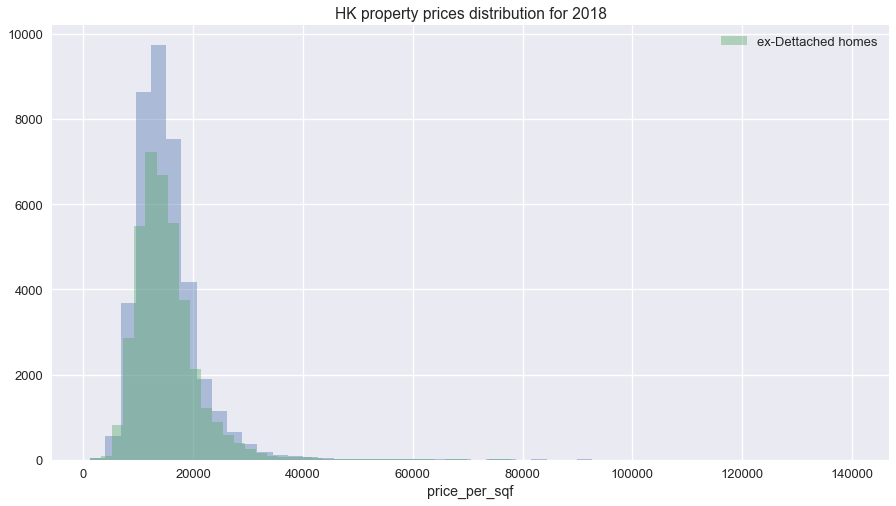

In [14]:
chart_data = df_sub

plt.figure( figsize = (15, 8))
sns.set(style = 'darkgrid', context = 'talk')
g = sns.distplot( 
            chart_data['price_per_sqf'],
            kde = False, bins = 50
        )
sns.distplot( 
            chart_data[chart_data.flat_type == 'n']['price_per_sqf'],
            kde = False, bins = 50, label = 'ex-Dettached homes'
        )

g.set_title('HK property prices distribution for 2018')
g.legend(loc='upper right')

### Let's only look at 'Normal' Homes

Text(0.5,1,'HK property prices boxplot by region for 2018')

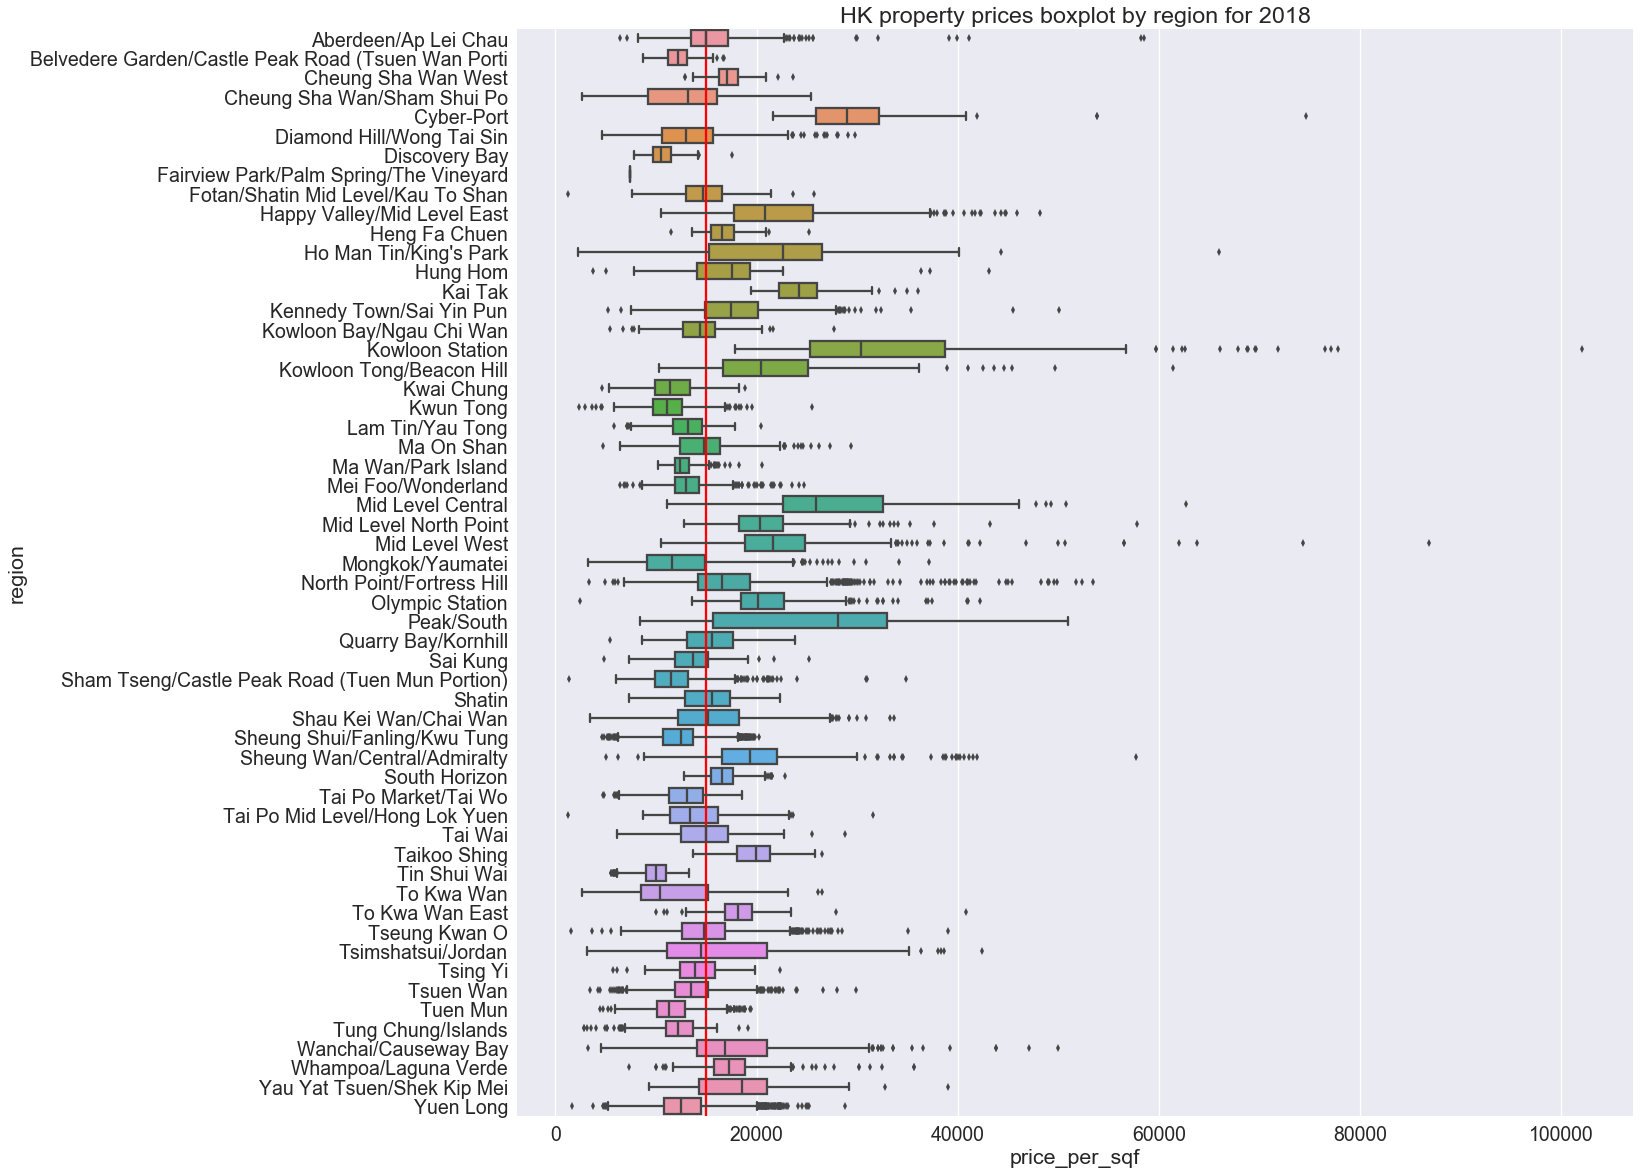

In [18]:
gdf = df_sub[ df_sub.flat_type == 'n'].sort_values( by = 'region')

plt.figure(figsize = (20,20))
sns.set(style = 'darkgrid', context = 'talk', font_scale= 1.5)
g = sns.boxplot(x ='price_per_sqf', y = 'region', data = gdf )

mean_price = gdf.price_per_sqf.mean()
g.vlines( mean_price, g.get_ylim()[0], g.get_ylim()[1], color = 'r')
g.set_title('HK property prices boxplot by region for 2018')

# for label in g.get_xticklabels():
#     label.set_rotation(90)

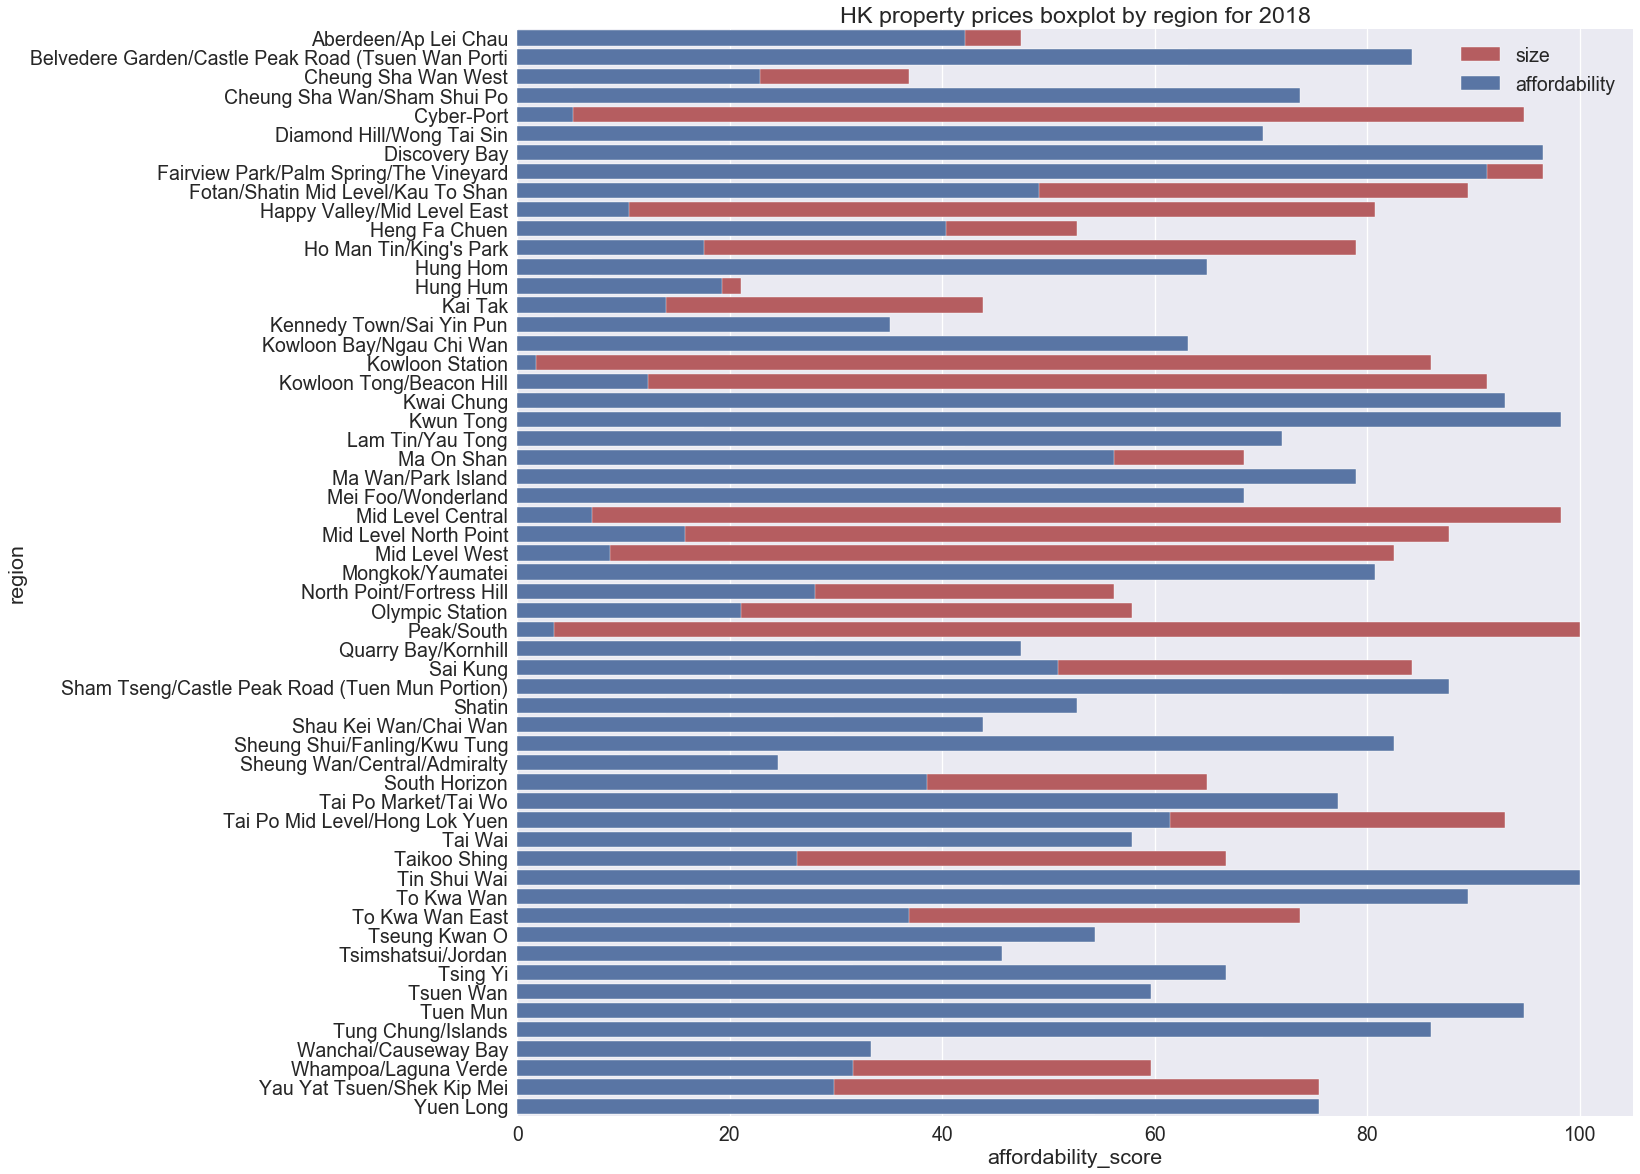

In [161]:
def rank_to_score( rank, class_size):
    return (class_size - rank + 1) / class_size * 100

gdf = df_agg.reset_index()
gdf['size_score'] = gdf[('saleablearea', 'size_rank')].apply( lambda x: rank_to_score(x, len(gdf)))
gdf['affordability_score'] = gdf[('price_per_sqf', 'affordability_rank')].apply( lambda x: rank_to_score(x, len(gdf)))

stacked = gdf.set_index('region')
stacked = stacked[['size_score', 'affordability_score']].stack().reset_index().rename(columns = {0:'value'})

plt.figure(figsize = (20,20))
sns.set(style = 'darkgrid', context = 'talk', font_scale= 1.5)
# g = sns.barplot(x = 'size_score', y = 'region', data = gdf , 
#                 color = 'r',
#                 edgecolor = 'white',
#                 label = 'size')
# sns.barplot( x = 'affordability_score', y = 'region', data = gdf, 
#                 color = 'b',
#                 edgecolor = 'white', 
#                 label = 'affordability')

#gdf.set_index('region')[['size_score', 'affordability_score']].plot.bar(stacked = False)

sns.barplot( x = stacked.region, y = stacked.value)

g.set_title('HK property prices boxplot by region for 2018')
g.legend()

In [44]:
df_agg.sort_index().reset_index()


region price_per_sqf  \
                                                         deal_count   
0                                Aberdeen/Ap Lei Chau          1371   
1   Belvedere Garden/Castle Peak Road (Tsuen Wan P...           467   
2                                 Cheung Sha Wan West          1306   
3                         Cheung Sha Wan/Sham Shui Po          3068   
4                                          Cyber-Port           167   
5                           Diamond Hill/Wong Tai Sin          2308   
6                                       Discovery Bay           742   
7              Fairview Park/Palm Spring/The Vineyard           257   
8                  Fotan/Shatin Mid Level/Kau To Shan           555   
9                         Happy Valley/Mid Level East          1284   
10                                      Heng Fa Chuen           245   
11                             Ho Man Tin/King's Park          2358   
12                                           Hung Hom           345   
13                                            Kai Tak          1947   
14                           Kennedy Town/Sai Yin Pun          2391   
15                           Kowloon Bay/Ngau Chi Wan          1475   
16                                    Kowloon Station           524   
17                           Kowloon Tong/Beacon Hill           415   
18                                         Kwai Chung           984   
19                                          Kwun Tong          1093   
20                                   Lam Tin/Yau Tong          1028   
21                                         Ma On Shan          2755   
22                                 Ma Wan/Park Island           431   
23                                 Mei Foo/Wonderland          1121   
24                                  Mid Level Central           352   
25                              Mid Level North Point           288   
26                                     Mid Level West          1656   
27                                   Mongkok/Yaumatei          3539   
28                          North Point/Fortress Hill          2876   
29                                    Olympic Station          1588   
30                                         Peak/South           262   
31                                Quarry Bay/Kornhill          1127   
32                                           Sai Kung           380   
33     Sham Tseng/Castle Peak Road (Tuen Mun Portion)          1865   
34                                             Shatin          2669   
35                              Shau Kei Wan/Chai Wan          2814   
36                       Sheung Shui/Fanling/Kwu Tung          2408   
37                       Sheung Wan/Central/Admiralty          1113   
38                                      South Horizon           346   
39                               Tai Po Market/Tai Wo          1850   
40                     Tai Po Mid Level/Hong Lok Yuen           692   
41                                            Tai Wai          1329   
42                                       Taikoo Shing           570   
43                                       Tin Shui Wai          1857   
44                                         To Kwa Wan          3738   
45                                    To Kwa Wan East           131   
46                                      Tseung Kwan O          5175   
47                                 Tsimshatsui/Jordan          1016   
48                                           Tsing Yi          1214   
49                                          Tsuen Wan          4178   
50                                           Tuen Mun          4970   
51                                 Tung Chung/Islands          1242   
52                               Wanchai/Causeway Bay          1822   
53                               Whampoa/Laguna Verde          1344   
54                         Yau Yat Tsuen/Shek Kip Mei           340   


AttributeError: 'NoneType' object has no attribute 'update'

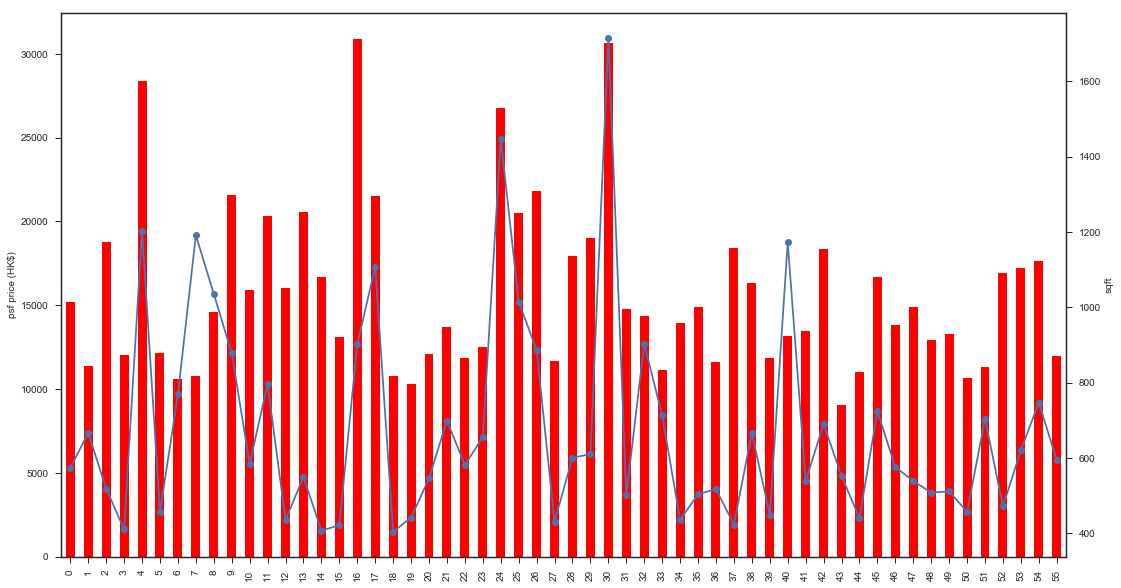

In [69]:
df_g = df_agg.sort_index().reset_index()

fig, ax1 = plt.subplots(figsize=(18, 10))
ax2 = ax1.twinx()

g = df_g[('price_per_sqf', 'deal_price_avg')].plot(kind = 'bar', y = 'region', color='red',
                                               rot = 90,
                                               ax=ax1, use_index = False)
df_g[('saleablearea', 'size_avg')].plot(kind = 'line' , y = 'region', marker = 'o', ax = ax2, use_index = False)

# ax1.set_ylim(12500,16000)
# ax1.yaxis.tick_left()
# ax1.tick_params(labelsize=10)
ax1.set_ylabel("psf price (HK$)",fontsize=10)
# ax1.set_xlabel("Transaction month",fontsize=10)
# ax1.grid(False)
# ax1.legend(loc=2, fontsize=10)

# ax2.yaxis.tick_right()
# ax2.tick_params(labelsize=10)
ax2.set_ylabel("sqft",fontsize=10)
# ax2.grid(False)
# ax2.legend(loc=1, fontsize=10)

# plt.show()

ax1.set_xticks( list(df_g.region) , minor = False)

In [67]:
list(df_g.region)

['Aberdeen/Ap Lei Chau',
 'Belvedere Garden/Castle Peak Road (Tsuen Wan Porti',
 'Cheung Sha Wan West',
 'Cheung Sha Wan/Sham Shui Po',
 'Cyber-Port',
 'Diamond Hill/Wong Tai Sin',
 'Discovery Bay',
 'Fairview Park/Palm Spring/The Vineyard',
 'Fotan/Shatin Mid Level/Kau To Shan',
 'Happy Valley/Mid Level East',
 'Heng Fa Chuen',
 "Ho Man Tin/King's Park",
 'Hung Hom',
 'Kai Tak',
 'Kennedy Town/Sai Yin Pun',
 'Kowloon Bay/Ngau Chi Wan',
 'Kowloon Station',
 'Kowloon Tong/Beacon Hill',
 'Kwai Chung',
 'Kwun Tong',
 'Lam Tin/Yau Tong',
 'Ma On Shan',
 'Ma Wan/Park Island',
 'Mei Foo/Wonderland',
 'Mid Level Central',
 'Mid Level North Point',
 'Mid Level West',
 'Mongkok/Yaumatei',
 'North Point/Fortress Hill',
 'Olympic Station',
 'Peak/South',
 'Quarry Bay/Kornhill',
 'Sai Kung',
 'Sham Tseng/Castle Peak Road (Tuen Mun Portion)',
 'Shatin',
 'Shau Kei Wan/Chai Wan',
 'Sheung Shui/Fanling/Kwu Tung',
 'Sheung Wan/Central/Admiralty',
 'South Horizon',
 'Tai Po Market/Tai Wo',
 'Tai Po Mid

Text(0.5,1,'HK property size boxplot by region for 2018')

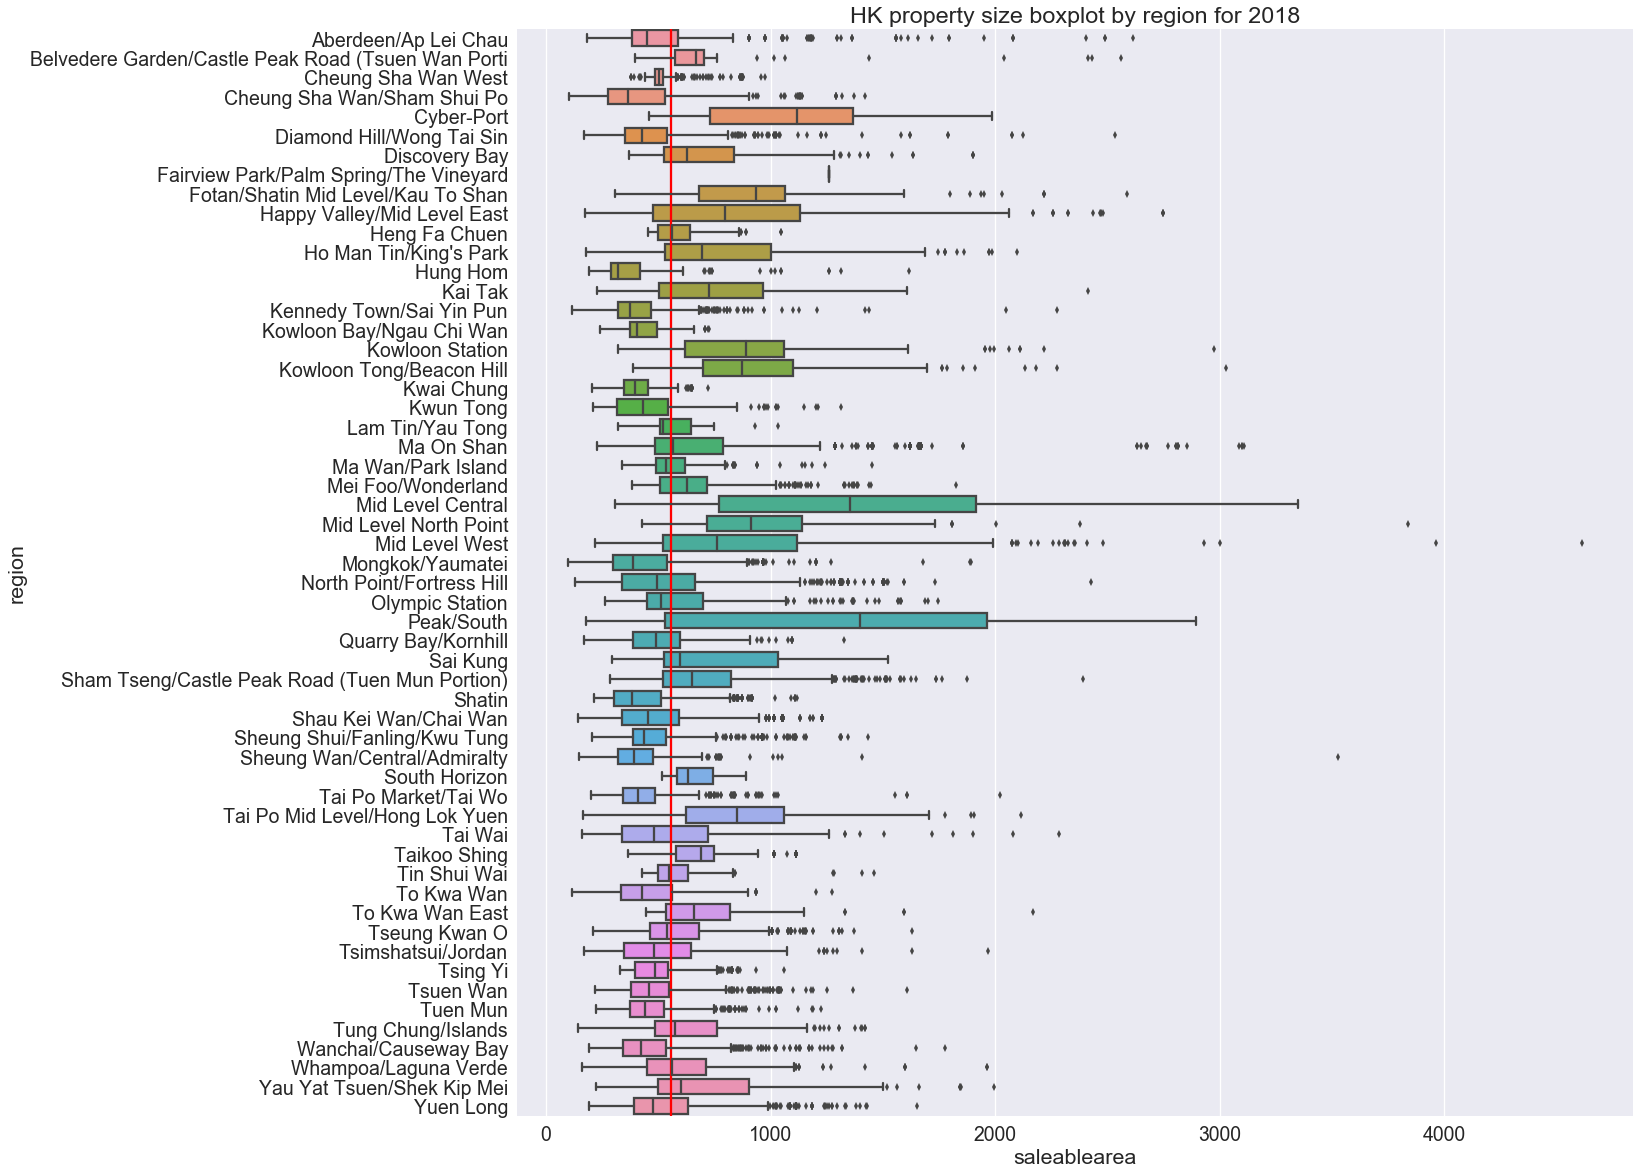

In [19]:
gdf = df_sub[ df_sub.flat_type == 'n'].sort_values( by = 'region')

plt.figure(figsize = (20,20))
sns.set(style = 'darkgrid', context = 'talk', font_scale = 1.5)
g = sns.boxplot(x ='saleablearea', y = 'region', data = gdf , orient = 'h')

mean_price = gdf['saleablearea'].mean()
g.vlines( mean_price, g.get_ylim()[0], g.get_ylim()[1], color = 'r')
g.set_title('HK property size boxplot by region for 2018')

# for label in g.get_xticklabels():
#     label.set_rotation(90)

### Let's see the relationships between our features

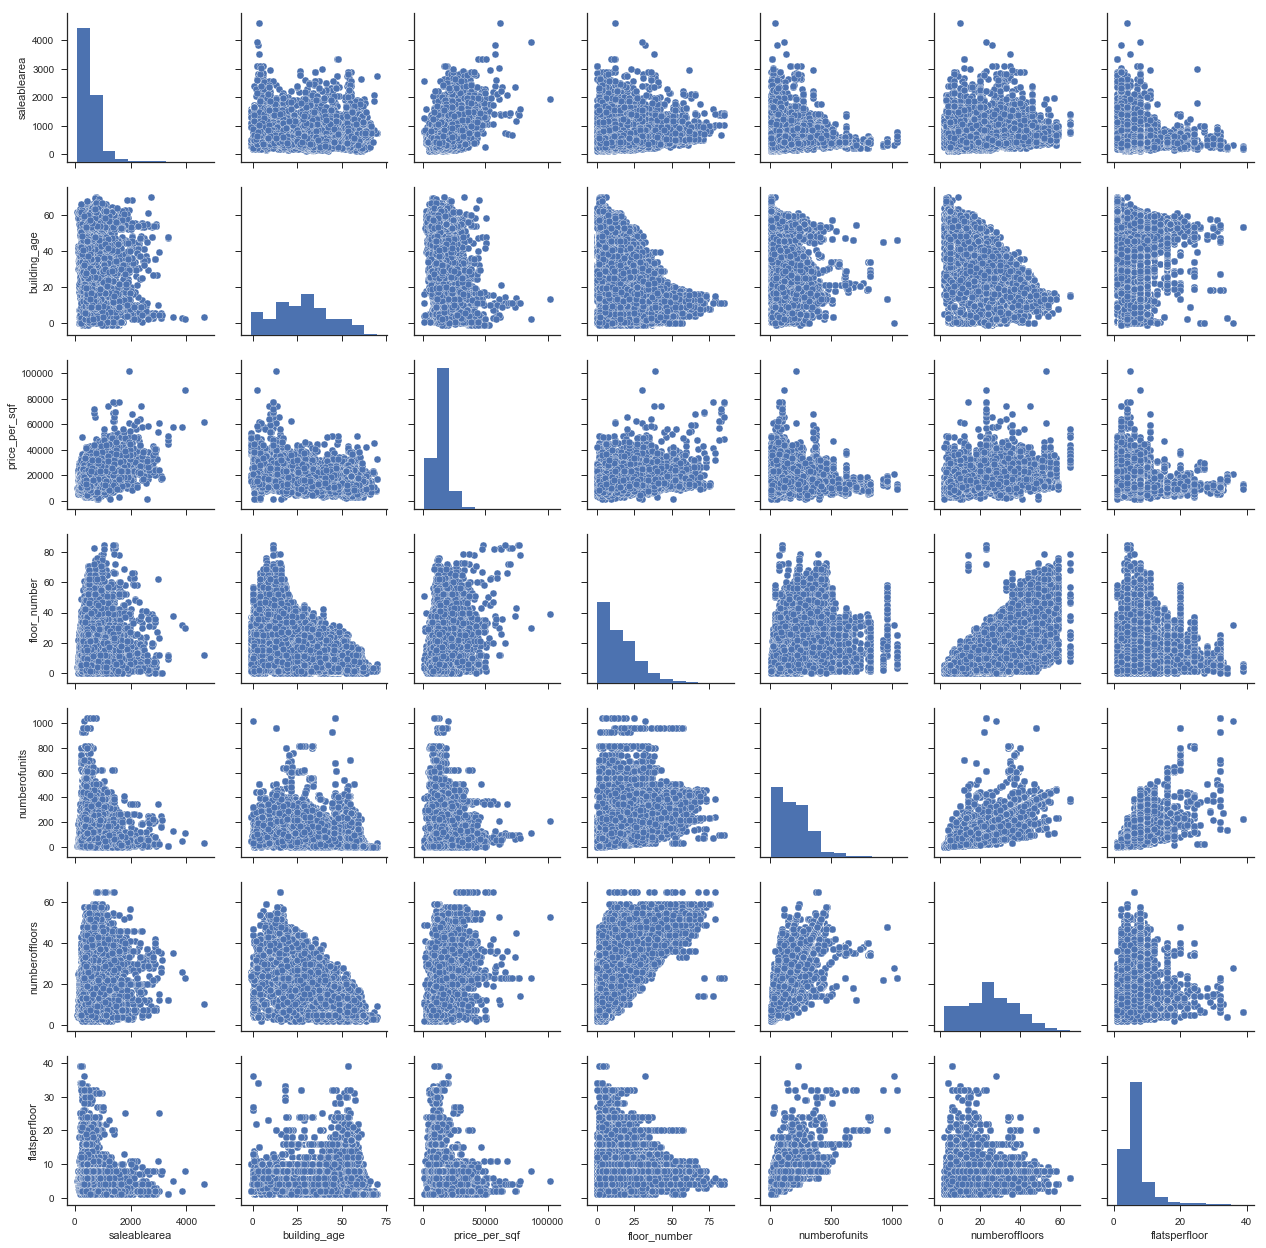

In [20]:
l_features = ['saleablearea', 'building_age', 'price_per_sqf', 'floor_number',
              'numberofunits', 'numberoffloors', 'flatsperfloor']

sns.set(style="ticks", color_codes=True)
df_chart = df_sub[df_sub.flat_type == 'n'][l_features]
g = sns.pairplot( df_chart )

### How do the various features look vs our target: `price_per_sqf`

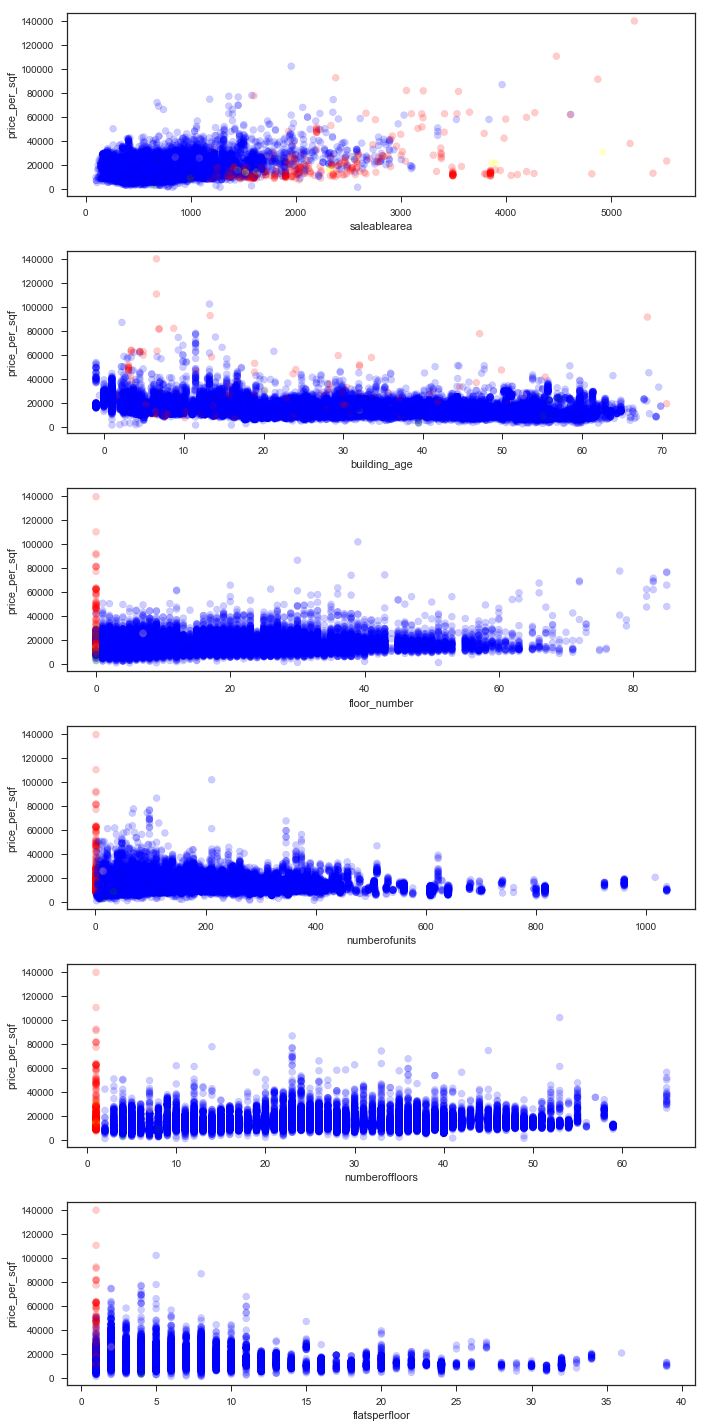

In [24]:
color_dict = { 'n': 'blue', 'd': 'red', 'l': 'yellow', 'b': 'green', 'p': 'pink'}
l_scatter = ['saleablearea', 'building_age', 'floor_number', 
              'numberofunits', 'numberoffloors', 'flatsperfloor']

fig, axe = plt.subplots( len(l_scatter), 1, figsize = (10, 20))
for i , col in enumerate( l_scatter):
    axe[i]. scatter (
        x = df_sub[ col ],
        y = df_sub['price_per_sqf'],
        c = df_sub['flat_type'].apply( lambda x: color_dict[x]),
        alpha = 0.2
    )
    axe[i].set_ylabel('price_per_sqf')
    axe[i].set_xlabel( col )
plt.tight_layout()

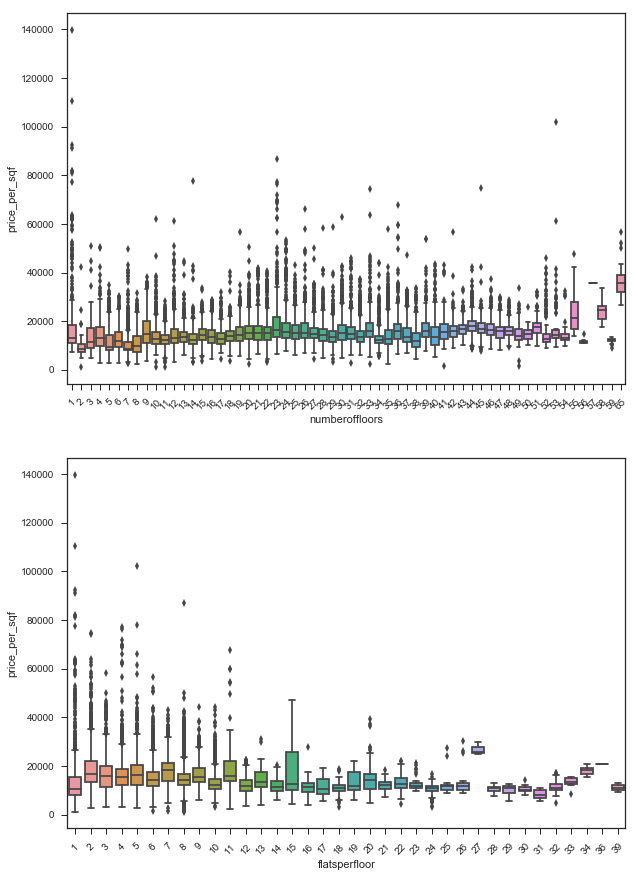

In [26]:
color_dict = { 0: 'blue',  1: 'red'}
l_box = ['numberoffloors', 'flatsperfloor']

fig, axe = plt.subplots( len(l_box), 1, figsize = (10, 15))
for i , col in enumerate( l_box):
    g = sns.boxplot(
        x = col ,
        y = 'price_per_sqf',
        data = df_sub,
        ax = axe[i]
    )

    for label in g.get_xticklabels():
        label.set_rotation(45)

### Are smaller flats more expensive?

Text(0.5,1,'price vs size')

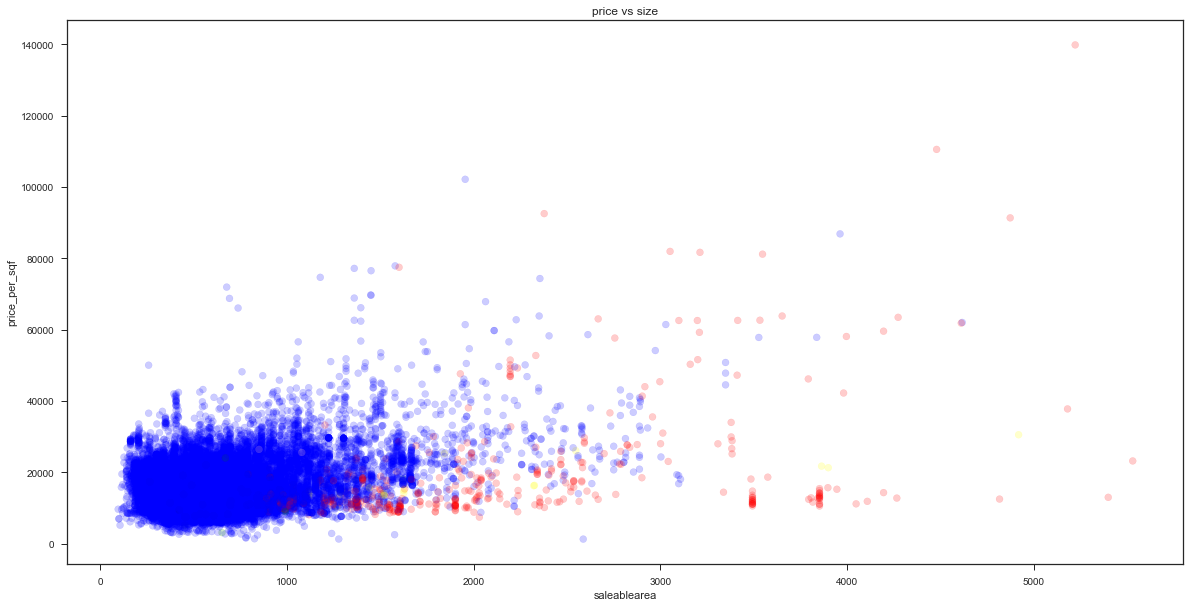

In [28]:
color_dict = { 'n': 'blue', 'd': 'red', 'l': 'yellow', 'b': 'green', 'p': 'pink'}
gdf = df_sub

plt.figure(figsize = (20,10))
plt.scatter (
    x = gdf['saleablearea'],
    y = gdf['price_per_sqf'],
    c = gdf['flat_type'].apply( lambda x: color_dict[x]),
    alpha = 0.2
)
plt.ylabel('price_per_sqf')
plt.xlabel('saleablearea')
plt.title( 'price vs size')

### Are flats bigger in older building?

Text(0.5,1,'age vs size')

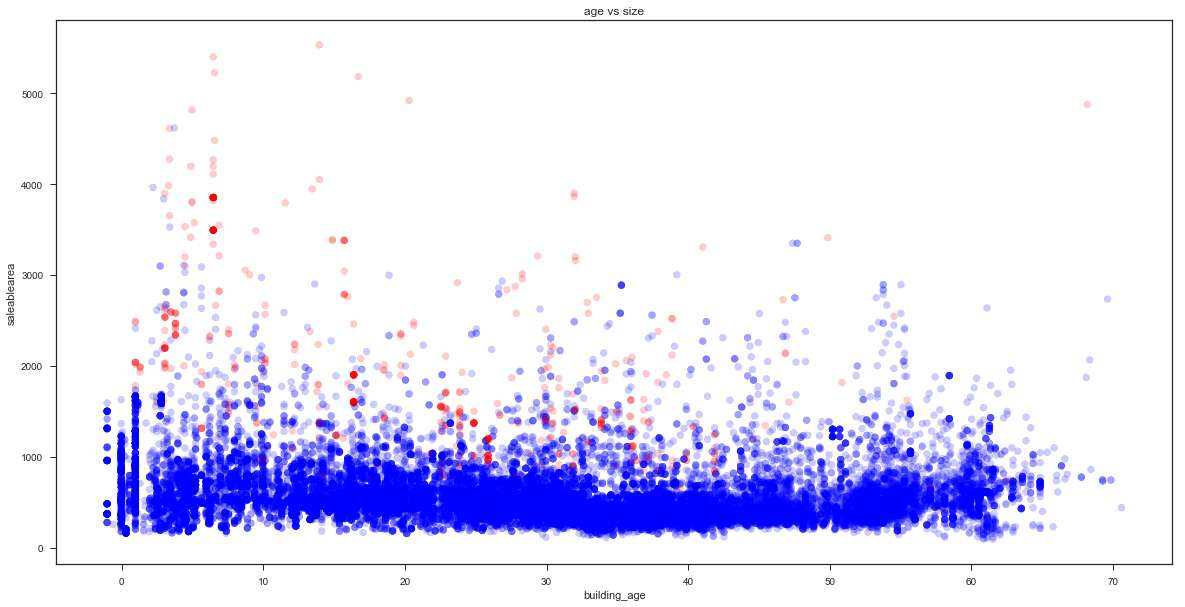

In [72]:
color_dict = { 0: 'blue',  1: 'red'}

plt.figure(figsize = (20,10))
plt.scatter (
    x = gdf['building_age'],
    y = gdf['saleablearea'],
    c = gdf['is_dettached'].apply( lambda x: color_dict[x]),
    alpha = 0.2
)
plt.ylabel('saleablearea')
plt.xlabel('building_age')
plt.title( 'age vs size')

## Findings
* **location matters!**
    * as a matter of fact, Centaline even divide flats into 'Large' units and 'small and medium' per [this explanation](http://www1.centadata.com/cci/CCUI_e.html), we can make this into a feature for machine learning later
* `flat_type != 'n'` introduce a lot of noise
* How to remove 'inflation' or the 'seasonality' in the price data?
    * Centaline has the [CCI](http://www1.centadata.com/cci/notes_e.htm) which comes in various flavours and the historical data is accessible [here](http://202.72.14.52/p2/cci/SearchHistory.aspx) or more generally [here](http://www1.centadata.com/cci/cci_e.htm)
* Best place to buy in 2018 in terms of average size of flats and affordability are:
    * DB
    * Fairview Park
    * Castle Peak Road
    * Tung Chung
* The hottest regions in terms of # of transactions are:
    * TKO
    * Tuen Man
    * Yuen Long